In [1]:
import data

import sys
sys.path.append("..")

import matplotlib.pyplot as plt

from opt import graph_id, graph_id_rew

from arch import arch
from arch import model

import torch
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

In [3]:
N = 50
k = 4
p = 0.4
q = 0.05

M = 1#50
p_n = 0.1
eps = 0.15
L = 4

In [4]:
dataset = data.SBMComLabel(N, k, p, q, M, L, data="diffused_sparse", n_deltas=k)
dataset.pert_S()

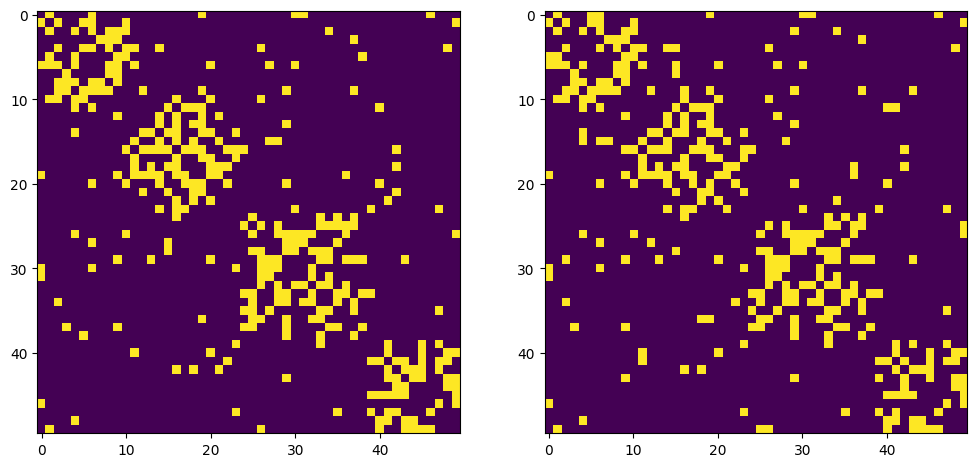

In [5]:
f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(dataset.S)
ax[1].imshow(dataset.Sn)

In [6]:
lr = 1e-2
wd = 0
n_epochs = 50
n_layers = 3
hid_dim = 128
eval_freq = 100

n_iters = 30

In [7]:
lambd, gamma, delta, inc_gamma = [5e-4, 1e-4, 10., 1.]
gamma = 1e-3

In [8]:
N_train = int(0.7*N)
dataset.create_mask(N_train)

In [9]:
S_gcn = torch.Tensor(dataset.Sn).to(device)

in_dim = 1
out_dim = k

In [10]:
X = torch.Tensor(dataset.x[:,None]).to(device)
Y = torch.LongTensor(dataset.y).to(device)
X.shape, Y.shape, X.dtype

(torch.Size([50, 1]), torch.Size([50]), torch.float32)

In [11]:
# GNN Ignore
gcn_ignore = arch.GCNCoefs(S_gcn, in_dim, hid_dim, out_dim, n_layers, L).to(device)
model_gnn_ignore = model.Model(gcn_ignore, n_epochs*n_iters, lr, wd, eval_freq)

model_gnn_ignore.test_clas(S_gcn, X, Y, gamma, dataset.train_mask, [], dataset.test_mask)

Epoch 1/1500 - Loss: 4647.78759765625 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 100/1500 - Loss: 133.038330078125 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 200/1500 - Loss: 39.36719512939453 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Epoch 300/1500 - Loss: 10.710365295410156 - Train Acc: 0.22857142984867096 - Test Acc: 0.20000001788139343
Epoch 400/1500 - Loss: 4.13880729675293 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Epoch 500/1500 - Loss: 1.3535692691802979 - Train Acc: 0.3142857253551483 - Test Acc: 0.2666666805744171
Epoch 600/1500 - Loss: 1.0915980339050293 - Train Acc: 0.4285714328289032 - Test Acc: 0.5333333611488342
Epoch 700/1500 - Loss: 1.0521305799484253 - Train Acc: 0.4285714328289032 - Test Acc: 0.6000000238418579
Epoch 800/1500 - Loss: 1.0249780416488647 - Train Acc: 0.4285714328289032 - Test Acc: 0.6000000238418579
Epoch 900/1500 - Loss: 1.0090876817703247 - Train Acc: 0.4

(array([0.25714287, 0.25714287, 0.25714287, ..., 0.2857143 , 0.2857143 ,
        0.2857143 ]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([0.40000004, 0.40000004, 0.40000004, ..., 0.20000002, 0.20000002,
        0.20000002]),
 array([4.64778760e+03, 5.01208057e+03, 3.23080396e+03, ...,
        1.34531176e+00, 1.34530771e+00, 1.34530699e+00]))

In [12]:
S_ten = torch.Tensor(dataset.S).to(device)

gcn_unpert = arch.GCNCoefs(S_ten, in_dim, hid_dim, out_dim, n_layers, L).to(device)
model_gnn_unpert = model.Model(gcn_unpert, n_epochs*n_iters, lr, wd, eval_freq)

model_gnn_unpert.test_clas(S_ten, X, Y, gamma, dataset.train_mask, [], dataset.test_mask)

Epoch 1/1500 - Loss: 3887.753662109375 - Train Acc: 0.22857142984867096 - Test Acc: 0.20000001788139343
Epoch 100/1500 - Loss: 107.62351989746094 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Epoch 200/1500 - Loss: 20.154563903808594 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 300/1500 - Loss: 107.38243865966797 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 400/1500 - Loss: 1.723096489906311 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 500/1500 - Loss: 1.2880223989486694 - Train Acc: 0.37142857909202576 - Test Acc: 0.2666666805744171
Epoch 600/1500 - Loss: 1.7701258659362793 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Epoch 700/1500 - Loss: 1.354291558265686 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Epoch 800/1500 - Loss: 1.3483444452285767 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Epoch 900/1500 - Loss: 1.3493850231170654 - Train 

(array([0.22857143, 0.2857143 , 0.25714287, ..., 0.2857143 , 0.2857143 ,
        0.2857143 ]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([0.20000002, 0.20000002, 0.40000004, ..., 0.20000002, 0.20000002,
        0.20000002]),
 array([3.88775366e+03, 1.23569141e+03, 4.45070068e+03, ...,
        1.34781432e+00, 1.34780943e+00, 1.34780526e+00]))

In [13]:
S_id = dataset.Sn.copy()

gcn_model = arch.GCNCoefs(S_gcn, in_dim, hid_dim, out_dim, n_layers, L).to(device)
model_gcn_robust = model.Model(gcn_model, n_epochs, lr, wd, eval_freq)

acc_train = np.zeros((n_iters, n_epochs))
acc_test = np.zeros((n_iters, n_epochs))
losses = np.zeros((n_iters, n_epochs))

for i in range(n_iters):
    #print("**************************************")
    print(f"************ Iteration {i} ***********", end="")
    #print("**************************************")

    S_gcn = torch.Tensor(S_id).to(device)

    gcn_model.update_Spow(S_gcn)
    
    # Filter estimation
    #gcn_model = GCN(S_gcn, in_dim, hid_dim, out_dim, n_layers, K).to(device)
    #gcn_model.h.data = h_id
    acc_train[i,:], _, acc_test[i,:], losses[i,:] = model_gcn_robust.test_clas(S_ten, X, Y, gamma, dataset.train_mask, [], dataset.test_mask)

    h_id = gcn_model.h.data
    H_id = torch.sum(h_id[:,None,None]*gcn_model.Spow, 0).cpu().numpy()

    #print("Graph identification")
    # Graph estimation
    S_id = graph_id(dataset.Sn, H_id, dataset.Cy, lambd, gamma, delta)

    err_h = ((dataset.h - h_id.cpu().numpy())**2).sum()
    err_H = ((dataset.H - H_id)**2).sum()
    err_S = ((dataset.S - S_id)**2).sum()
    print(f"Stats: {err_h=} - {err_H=} - {err_S=} - {losses[i,-1]=}")
    #print()

************ Iteration 0 ***********Epoch 1/50 - Loss: 5020.2421875 - Train Acc: 0.2571428716182709 - Test Acc: 0.40000003576278687
Stats: err_h=2.827316064735605 - err_H=25672.028248497532 - err_S=59.99992161775494 - losses[i,-1]=282.5556335449219
************ Iteration 1 ***********Epoch 1/50 - Loss: 264.3282775878906 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Stats: err_h=1.416375072963753 - err_H=25718.087890905488 - err_S=59.999966967304616 - losses[i,-1]=69.42282104492188
************ Iteration 2 ***********Epoch 1/50 - Loss: 68.16173553466797 - Train Acc: 0.22857142984867096 - Test Acc: 0.20000001788139343
Stats: err_h=1.0168451221824368 - err_H=150639.51352008755 - err_S=59.99989097684113 - losses[i,-1]=7.177703380584717
************ Iteration 3 ***********Epoch 1/50 - Loss: 22.5211124420166 - Train Acc: 0.2857142984867096 - Test Acc: 0.20000001788139343
Stats: err_h=1.0082480725181182 - err_H=144500.70361822378 - err_S=59.9998987379738 - losses[i,-1]=1.412